In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Salvando o caminho do arquivo
path = 'C:/Users/Thiago/Documents/CSV/monthly-sunspots.csv'
# Criando o dataframe
df = pd.read_csv(path,index_col='Month',parse_dates=True)

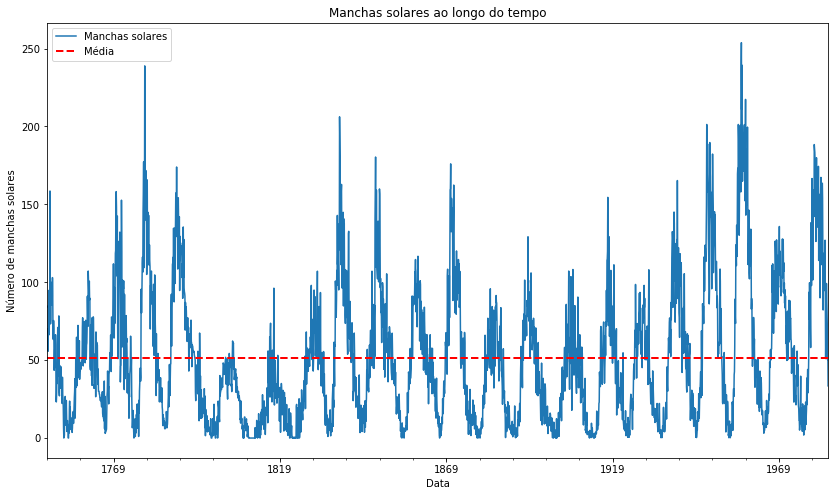

In [46]:
df['Sunspots'].plot(label='Manchas solares',figsize=(14,8))
plt.title('Manchas solares ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Número de manchas solares')
plt.axhline(df['Sunspots'].mean(),label='Média',c='r',ls='--',lw=2)
plt.legend();

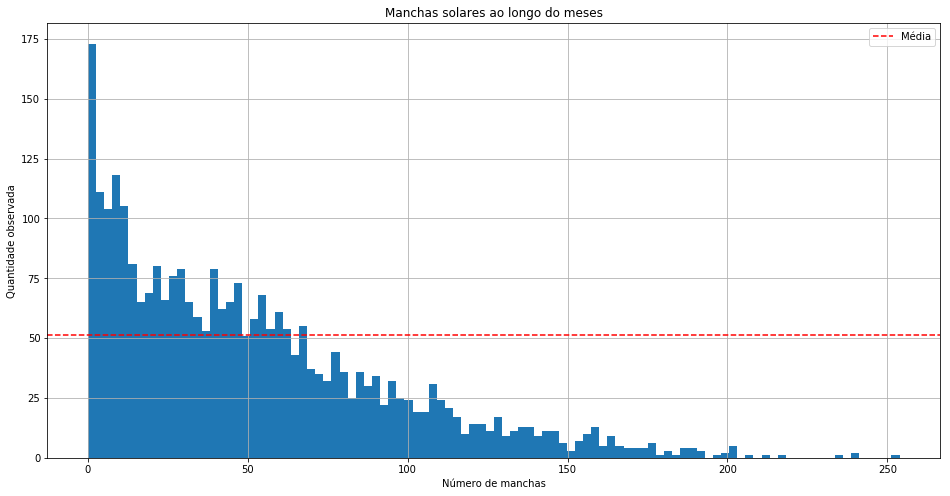

In [45]:
# Plotando histograma
plt.figure(figsize=(16,8))
df['Sunspots'].hist(bins=100)
plt.axhline(df['Sunspots'].mean(),label='Média',c='r',ls='--')
plt.title('Manchas solares ao longo do meses')
plt.xlabel('Número de manchas')
plt.ylabel('Quantidade observada')
plt.legend(loc='best');

In [14]:
# Feature engineering
def Engenharia(df):
    df['36_ma'] = df['Sunspots'].ewm(36).mean()

# Criando a variável preditiva
def Target(df):
    df['target'] = df['Sunspots'].shift(-1)
    df.replace(np.nan,0,inplace=True)

# Separando as características
def Processar(df):
    X = np.array([])
    y = np.array([])
    
    X = df.drop('target',axis=1)
    y = df['target'].values
    
    X = StandardScaler().fit_transform(X)
    
    return X,y

# Dividindo X,y em teste e treinamento
# 66% para treinamento | 33% para teste
def SplitData(X,y):
    train_size = int(0.66 * X.shape[0])
    
    X_train,X_test = X[:train_size], X[train_size:]
    y_train,y_test = y[:train_size], y[train_size:]
    
    return X_train,X_test,y_train,y_test

In [17]:
# Fazendo a chamada das funções
Engenharia(df)
Target(df)
X,y = Processar(df)
X_train,X_test,y_train,y_test = SplitData(X,y)

In [18]:
print('Primeiro registro em X:',X[0])
print('Primeiro registro em y:',y[0])

Primeiro registro em X: [0.15501487 0.28497086]
Primeiro registro em y: 62.6


In [19]:
# Visualizando os 5 primeiros registros do dataframe
df.head()

,Sunspots,36_ma,target
Month,,,
1749-01-01,58.0,58.000000,62.6
1749-02-01,62.6,60.331507,70.0
1749-03-01,70.0,63.643032,55.7
1749-04-01,55.7,61.574933,85.0
1749-05-01,85.0,66.520127,83.5


In [21]:
# Print do número de amostras
print('Total de amostras:', len(X))
print('Amostras p/ treino:',len(X_train))
print('Amostras p/ teste:',len(X_test))

Total de amostras: 2820
Amostras p/ treino: 1861
Amostras p/ teste: 959


In [22]:
# Definindo o modelo
# 2 camadas ocultas, 100 nós em cada camada
# Otimizador de pesos: lbfgs
model = MLPRegressor(hidden_layer_sizes=(100,100),solver='lbfgs')

In [35]:
# Treinando o modelo
model = model.fit(X_train,y_train)

In [36]:
# Armazenando as predições
y_pred = model.predict(X_test)

In [37]:
# Avaliando o desempenho
print('Acurácia no treinamento: {:.2f}'.format(model.score(X_train,y_train)))
print('Acurácia no teste: {:.2f}'.format(model.score(X_test,y_test)))
print('Erro médio absoluto: {:.2f}'.format(mean_absolute_error(y_test,y_pred)))
print('Media número de manchas: {:.2f}'.format(df['Sunspots'].mean()))

Acurácia no treinamento: 0.84
Acurácia no teste: 0.81
Erro médio absoluto: 15.19
Media número de manchas: 51.27


In [38]:
# Loop de auxilio para criação de outro dataframe
lista = []
for i in range(959):
    lista.append(i)

In [39]:
# Criando o dataframe dos valores reais contra as predições
data = [y_test,y_pred]
data = np.array(data)
data = data.reshape(959,2)
df_pred = pd.DataFrame(data,index=lista,columns=['real','pred'])

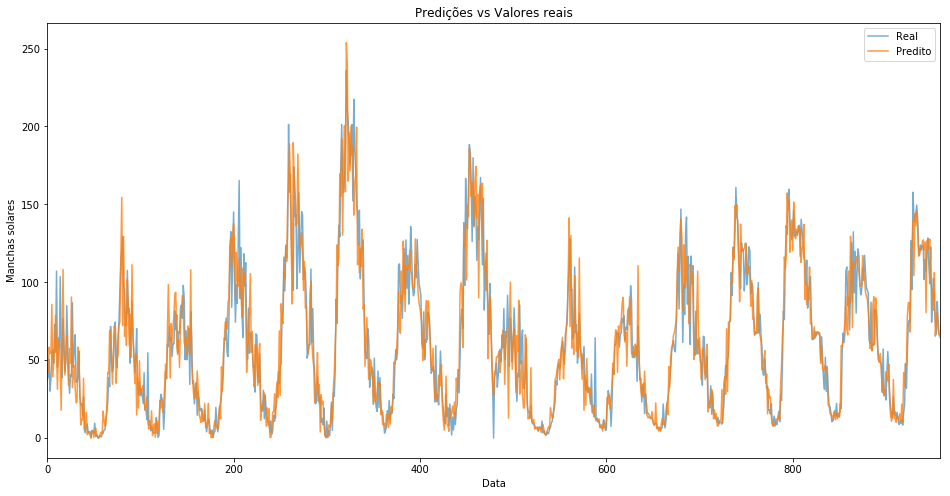

In [43]:
# Plot dos valores reais contra predições
plt.figure()
df_pred['real'].plot(label='Real',alpha=0.6,figsize=(16,8))
df_pred['pred'].plot(label='Predito',alpha=0.8)
plt.title('Predições vs Valores reais')
plt.ylabel('Manchas solares')
plt.xlabel('Data')
plt.legend();

In [ ]:
# https://www.linkedin.com/in/thiagomunich